# Машинное обучение, ФКН ВШЭ

## Практическое задание 5

### Общая информация
Дата выдачи: 08.11.2018

Мягкий дедлайн: 7:59MSK 18.11.2018

Жесткий дедлайн: 23:59MSK 19.11.2018

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [66]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [67]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

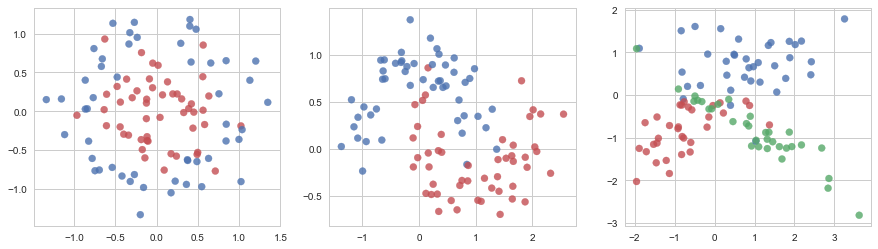

In [68]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [69]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

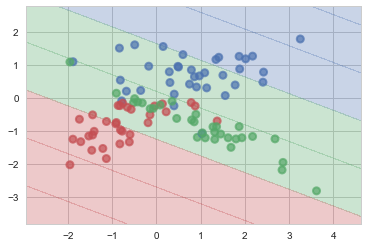

In [70]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [72]:
clf = DecisionTreeClassifier()

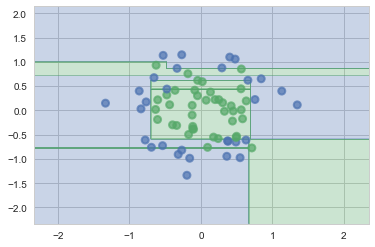

In [73]:
X_train, X_test, y_train, y_test = train_test_split(datasets[0][0], datasets[0][1], test_size=0.3, random_state=42)
dtc = clf.fit(X_train, y_train)
plot_surface(dtc, X_train, y_train)

In [74]:
y_pred = clf.predict(X_test)
print("Accuracy for test: ", accuracy_score(y_test, y_pred))
y_pred = clf.predict(X_train)
print("Accuracy for train: ", accuracy_score(y_train, y_pred))

Accuracy for test:  0.7666666666666667
Accuracy for train:  1.0


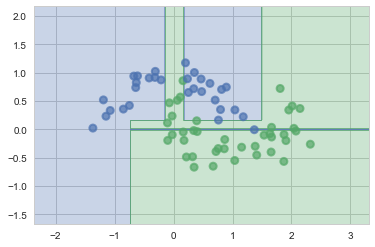

In [75]:
X_train, X_test, y_train, y_test = train_test_split(datasets[1][0], datasets[1][1], test_size=0.3, random_state=42)
dtc = clf.fit(X_train, y_train)
plot_surface(dtc, X_train, y_train)

In [76]:
y_pred = clf.predict(X_test)
print("Accuracy for test: ", accuracy_score(y_test, y_pred))
y_pred = clf.predict(X_train)
print("Accuracy for train: ", accuracy_score(y_train, y_pred))

Accuracy for test:  0.8666666666666667
Accuracy for train:  1.0


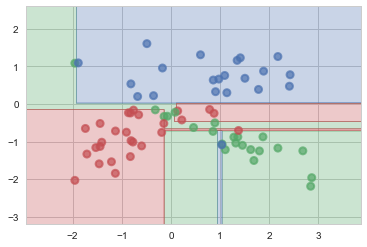

In [77]:
X_train, X_test, y_train, y_test = train_test_split(datasets[2][0], datasets[2][1], test_size=0.3, random_state=42)
dtc = clf.fit(X_train, y_train)
plot_surface(dtc, X_train, y_train)

In [78]:
y_pred = clf.predict(X_test)
print("Accuracy for test: ", accuracy_score(y_test, y_pred))
y_pred = clf.predict(X_train)
print("Accuracy for train: ", accuracy_score(y_train, y_pred))

Accuracy for test:  0.8
Accuracy for train:  1.0


__Ответ:__ accuracy относительно высок, поэтому можно сделать вывод, что деревья несильно переобучились (хотя смотря с чем сравнивать)

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

With max_depth = 2 and min_samples_leaf =  15
Accuracy for test:  0.7
Accuracy for train:  0.7857142857142857 

With max_depth = 2 and min_samples_leaf =  5
Accuracy for test:  0.6666666666666666
Accuracy for train:  0.8142857142857143 

With max_depth = 2 and min_samples_leaf =  1
Accuracy for test:  0.6333333333333333
Accuracy for train:  0.8285714285714286 

With max_depth = 4 and min_samples_leaf =  15
Accuracy for test:  0.7
Accuracy for train:  0.7857142857142857 

With max_depth = 4 and min_samples_leaf =  5
Accuracy for test:  0.9
Accuracy for train:  0.8714285714285714 

With max_depth = 4 and min_samples_leaf =  1
Accuracy for test:  0.7333333333333333
Accuracy for train:  0.9571428571428572 

With max_depth = None and min_samples_leaf =  15
Accuracy for test:  0.7
Accuracy for train:  0.7857142857142857 

With max_depth = None and min_samples_leaf =  5
Accuracy for test:  0.9
Accuracy for train:  0.8714285714285714 

With max_depth = None and min_samples_leaf =  1
Accuracy f

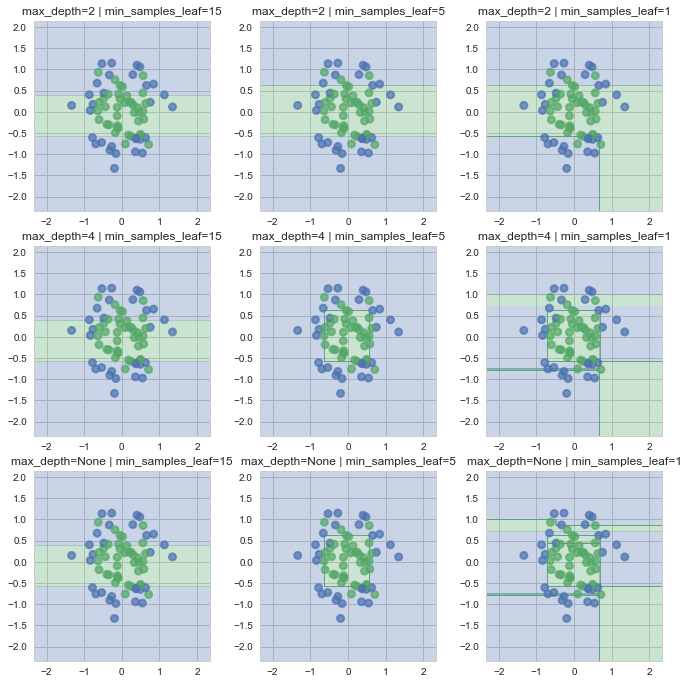

In [82]:
plt.figure(figsize=(10, 10))
x_train, x_test, y_train, y_test = train_test_split(datasets[0][0], datasets[0][1], test_size=0.3, random_state=42)
for i, max_depth in enumerate([2, 4, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(x_train, y_train)
        plt.subplot2grid((3, 3), (i, j))
        plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))
        plot_surface(clf, x_train, y_train)
        y_pred = clf.predict(x_test)
        print("With max_depth =", max_depth, "and min_samples_leaf = ", min_samples_leaf)
        print("Accuracy for test: ", accuracy_score(y_test, y_pred))
        y_pred = clf.predict(x_train)
        print("Accuracy for train: ", accuracy_score(y_train, y_pred), "\n")

With max_depth = 2 and min_samples_leaf =  15
Accuracy for test:  0.8
Accuracy for train:  0.8428571428571429 

With max_depth = 2 and min_samples_leaf =  5
Accuracy for test:  0.8
Accuracy for train:  0.8857142857142857 

With max_depth = 2 and min_samples_leaf =  1
Accuracy for test:  0.9333333333333333
Accuracy for train:  0.9142857142857143 

With max_depth = 4 and min_samples_leaf =  15
Accuracy for test:  0.8
Accuracy for train:  0.8428571428571429 

With max_depth = 4 and min_samples_leaf =  5
Accuracy for test:  0.7333333333333333
Accuracy for train:  0.9571428571428572 

With max_depth = 4 and min_samples_leaf =  1
Accuracy for test:  0.8666666666666667
Accuracy for train:  1.0 

With max_depth = None and min_samples_leaf =  15
Accuracy for test:  0.8
Accuracy for train:  0.8428571428571429 

With max_depth = None and min_samples_leaf =  5
Accuracy for test:  0.7333333333333333
Accuracy for train:  0.9571428571428572 

With max_depth = None and min_samples_leaf =  1
Accuracy f

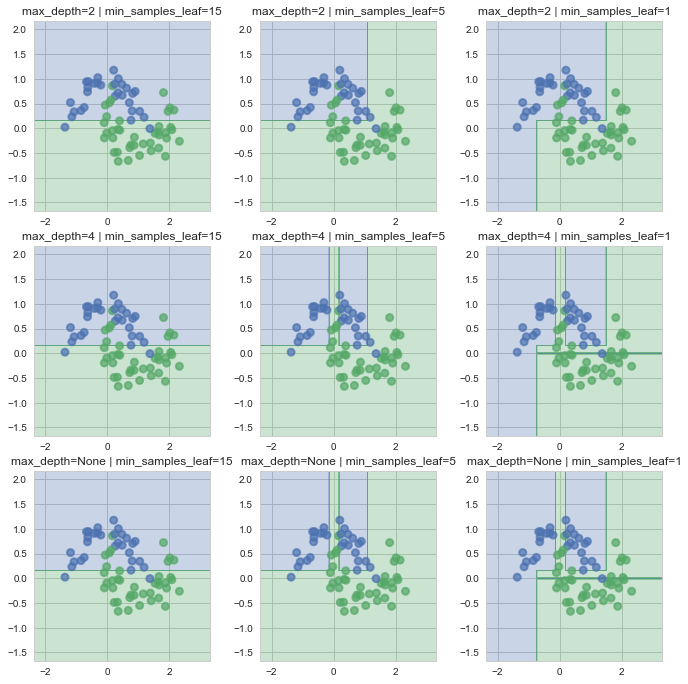

In [83]:
plt.figure(figsize=(10, 10))
x_train, x_test, y_train, y_test = train_test_split(datasets[1][0], datasets[1][1], test_size=0.3, random_state=42)
for i, max_depth in enumerate([2, 4, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(x_train, y_train)
        plt.subplot2grid((3, 3), (i, j))
        plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))
        plot_surface(clf, x_train, y_train)
        y_pred = clf.predict(x_test)
        print("With max_depth =", max_depth, "and min_samples_leaf = ", min_samples_leaf)
        print("Accuracy for test: ", accuracy_score(y_test, y_pred))
        y_pred = clf.predict(x_train)
        print("Accuracy for train: ", accuracy_score(y_train, y_pred), "\n")

With max_depth = 2 and min_samples_leaf =  15
Accuracy for test:  0.7666666666666667
Accuracy for train:  0.8857142857142857 

With max_depth = 2 and min_samples_leaf =  5
Accuracy for test:  0.7666666666666667
Accuracy for train:  0.8857142857142857 

With max_depth = 2 and min_samples_leaf =  1
Accuracy for test:  0.7666666666666667
Accuracy for train:  0.9 

With max_depth = 4 and min_samples_leaf =  15
Accuracy for test:  0.7666666666666667
Accuracy for train:  0.8857142857142857 

With max_depth = 4 and min_samples_leaf =  5
Accuracy for test:  0.7
Accuracy for train:  0.9 

With max_depth = 4 and min_samples_leaf =  1
Accuracy for test:  0.8333333333333334
Accuracy for train:  0.9571428571428572 

With max_depth = None and min_samples_leaf =  15
Accuracy for test:  0.7666666666666667
Accuracy for train:  0.8857142857142857 

With max_depth = None and min_samples_leaf =  5
Accuracy for test:  0.7
Accuracy for train:  0.9 

With max_depth = None and min_samples_leaf =  1
Accuracy f

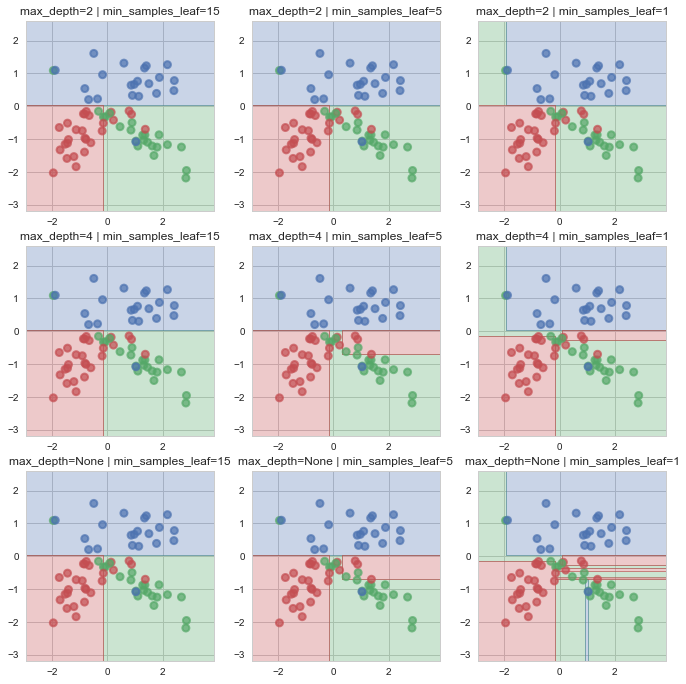

In [84]:
plt.figure(figsize=(10, 10))
x_train, x_test, y_train, y_test = train_test_split(datasets[2][0], datasets[2][1], test_size=0.3, random_state=42)
for i, max_depth in enumerate([2, 4, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(x_train, y_train)
        plt.subplot2grid((3, 3), (i, j))
        plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))
        plot_surface(clf, x_train, y_train)
        y_pred = clf.predict(x_test)
        print("With max_depth =", max_depth, "and min_samples_leaf = ", min_samples_leaf)
        print("Accuracy for test: ", accuracy_score(y_test, y_pred))
        y_pred = clf.predict(x_train)
        print("Accuracy for train: ", accuracy_score(y_train, y_pred), "\n")

__Ответ:__ оптимальность критерия останова сильно зависит от датасета